## Step 4.1

Calculate accuracies for unused data

In [28]:
accs_body=[]
accs_tail=[]

for col in ts_all.columns:
    accs_body.append(1-qualityMACAPE(es[col][:'2006-04-30'],ts_all[col][:'2006-04-30'])[0])
    accs_tail.append(1-qualityMACAPE(es[col]['2006-04-30':],ts_all[col]['2006-04-30':])[0])

## Step 4.2
Build the histogram of Accuracy distribution

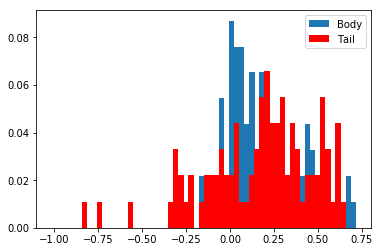

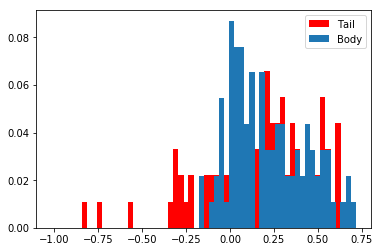

Body acc 12.05.05-30.04.06: 0.21669238447
Tail acc 30.04.06-13.06.06: 0.179029631742


In [65]:
accs_body=pd.Series(accs_body).dropna()
accs_tail=pd.Series(accs_tail).dropna()

bins=60

def acc_dens(accs,bins):
    dens=np.zeros(bins)
    interval=[-1.0,0.73]
    ac=[]
    for i in range(bins):
        a=interval[0]+(interval[1]-interval[0])*i/bins
        b=interval[0]+(interval[1]-interval[0])*(i+1)/bins
        for acc in accs:
            if acc>a and acc<=b:
                dens[i]+=1
        ac.append(a)
    dens=dens/dens.sum()
    return dens, ac

plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0],width=0.03,label='Body')
plt.bar(acc_dens(accs_tail,bins)[1], acc_dens(accs_tail,bins)[0],width=0.03,label='Tail',color='r')
plt.legend()
plt.show()

plt.bar(acc_dens(accs_tail,bins)[1], acc_dens(accs_tail,bins)[0],width=0.03,label='Tail',color='r')
plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0],width=0.03,label='Body')
plt.legend()
plt.show()

plt.bar(acc_dens(accs_body,bins)[1], acc_dens(accs_body,bins)[0]-acc_dens(accs_tail,bins)[0],width=0.03,label='Body-Tail')
plt.legend()
plt.show()


print('Body acc 12.05.05-30.04.06: '+str(accs_body.mean()))
print('Tail acc 30.04.06-13.06.06: '+str(accs_tail.mean()))

## Step 4.3
The barchart for unused data (the last one) has higher probability of accuracies more than 0 (normed arround 0.25). 